In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

C:\Users\graykar\Documents\Annaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
Heart_Data = pd.read_csv("C:\\Users\\graykar\\Downloads\\Pyhton\\Data Files\\Heart.csv")

In [3]:
Heart_Data.drop_duplicates(inplace=True)
X_train, X_test, y_train, y_test = train_test_split( Heart_Data , Heart_Data['target'] , test_size=0.20, random_state=1)
X_train.shape ,X_test.shape

((241, 14), (61, 14))

In [4]:
v_drop_col = []
for i in X_train.columns:
    v_cnt = len(X_train[i].value_counts())
    if (v_cnt == 2) & (i != 'target'):
        cros_tab = pd.crosstab(X_train[i], X_train.target, margins = True)
        chi2_value, p, dof, ex_table = stats.chi2_contingency(cros_tab, correction=False)
        if p < 0.05:
            print('Reject the Null hypothisis for :->' , i)
        else:
            print('Accept the Null hypothisis for :->',  i)
            v_drop_col.append(i)
    elif (v_cnt >2 ) & (v_cnt < 10 ) & (i != 'target'):
        cros_tab = pd.crosstab(X_train[i], X_train.target, margins = True)
        chi2_value, p, dof, ex_table = stats.chi2_contingency(cros_tab, correction=False)
        v_stats_sheet = stats.chi2.ppf(q=0.95, df=dof)
        if chi2_value > v_stats_sheet:
            print('Reject the Null hypothisis for :->' , i)
        else:
            print('Accept the Null hypothisis for :->',  i)
            v_drop_col.append(i)

v_drop_col

Reject the Null hypothisis for :-> sex
Reject the Null hypothisis for :-> cp
Accept the Null hypothisis for :-> fbs
Accept the Null hypothisis for :-> restecg
Reject the Null hypothisis for :-> exang
Reject the Null hypothisis for :-> slope
Reject the Null hypothisis for :-> ca
Reject the Null hypothisis for :-> thal


['fbs', 'restecg']

In [5]:
X_train.drop(v_drop_col,axis=1, inplace=True)

In [6]:
train_X = X_train.loc[: , [x for x in X_train.columns if x not in ['target']] ]
train_y = X_train['target']

In [7]:
from sklearn.preprocessing import MinMaxScaler 
minMaxScaler = MinMaxScaler()
train_X = minMaxScaler.fit_transform(train_X)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_X , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(train_y, KNN.predict(train_X))
con_mat

array([[ 97,  12],
       [ 13, 119]], dtype=int64)

In [14]:
train_X[1].reshape(-1,1)

array([[0.8125    ],
       [0.        ],
       [0.66666667],
       [0.30232558],
       [0.29209622],
       [0.33587786],
       [0.        ],
       [0.24193548],
       [0.5       ],
       [0.        ],
       [0.66666667]])

In [29]:
error = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(train_X , train_y)
    pred_i = KNN.predict(train_X)
    error.append(np.mean(pred_i != train_y))

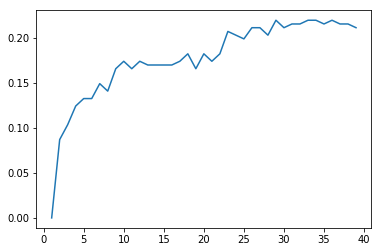

In [32]:
plt.plot(range(1,40) , error)